In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

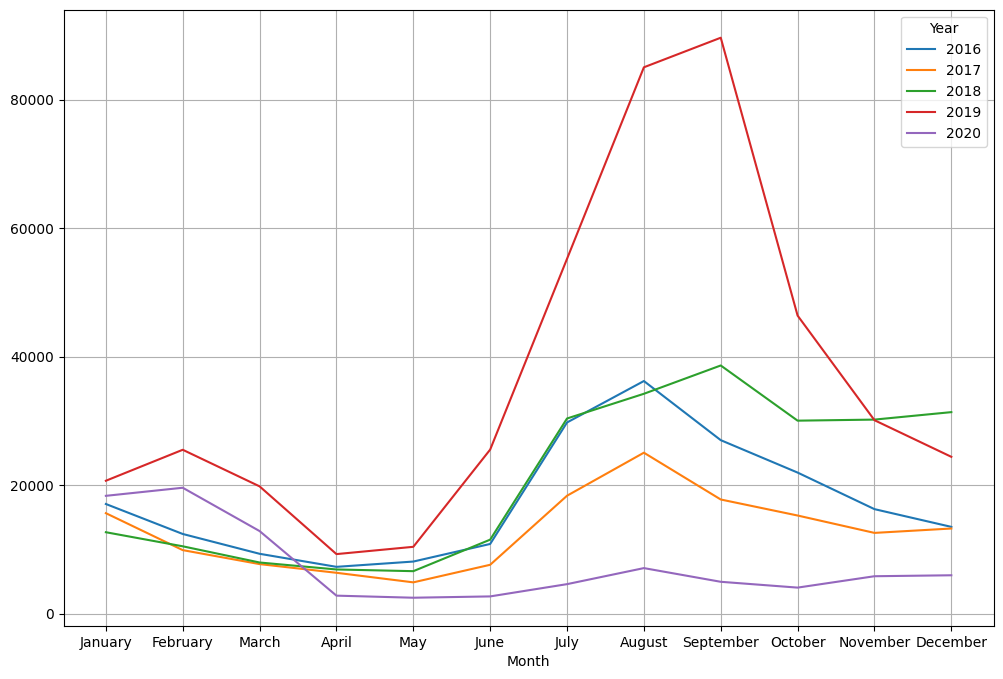

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1>Insight</h1>
<p>The consistent pattern across years suggests that dengue outbreaks are highly influenced by climate seasonality, and preventive interventions (cleanup drives, community fogging, education campaigns) should be intensified before and during the mid-year months, particularly June to September, to minimize case surges.</p>

<h1> LINE PLOT WITH SEABORN </h1>

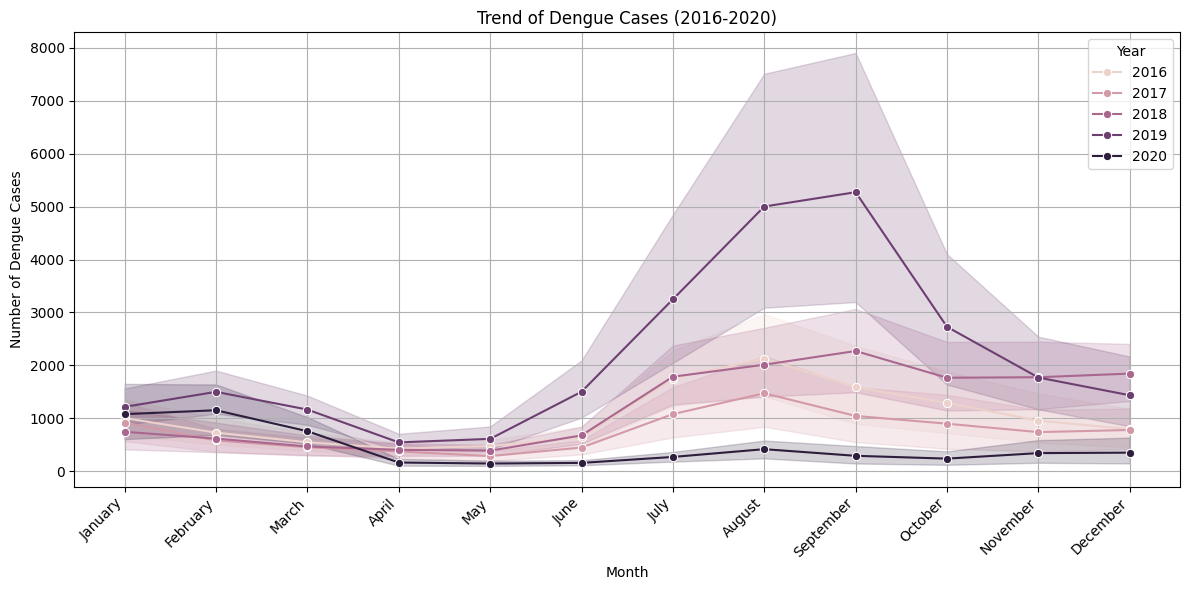

In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

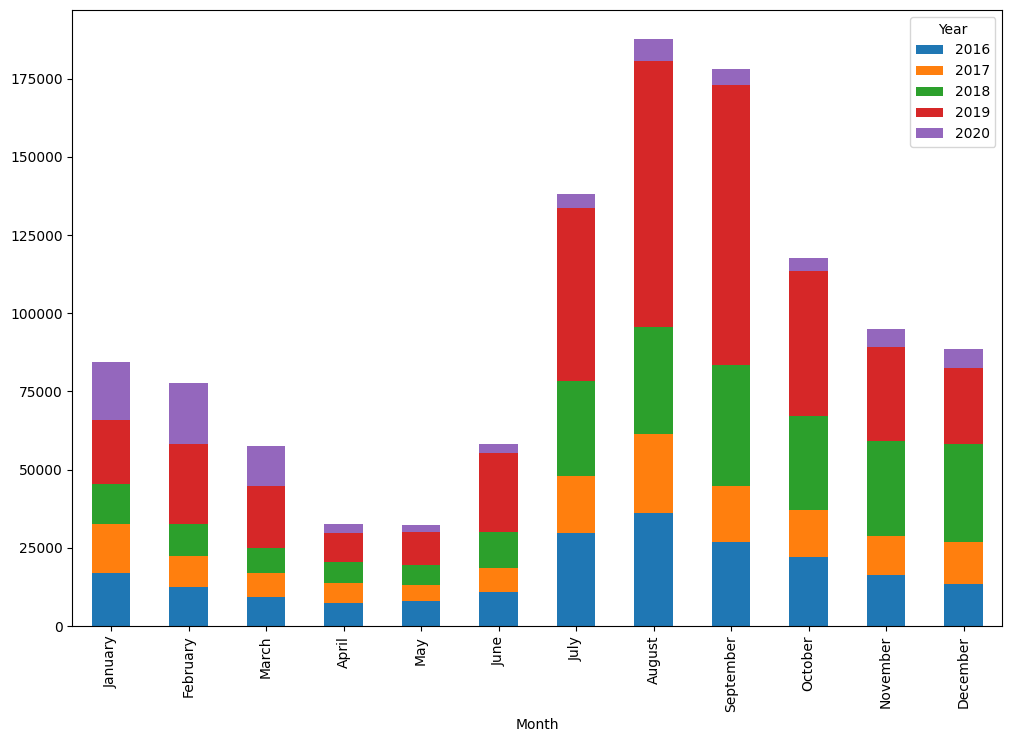

In [10]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Insight</h1>
<p>The stacked bar chart shows a clear seasonal pattern in dengue incidence across all years. Cases are lowest from January to March, begin to increase in April, and consistently peak between July and September, which aligns with the rainy season when mosquito breeding is most active. After September, cases gradually decline through the end of the year.</p>

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

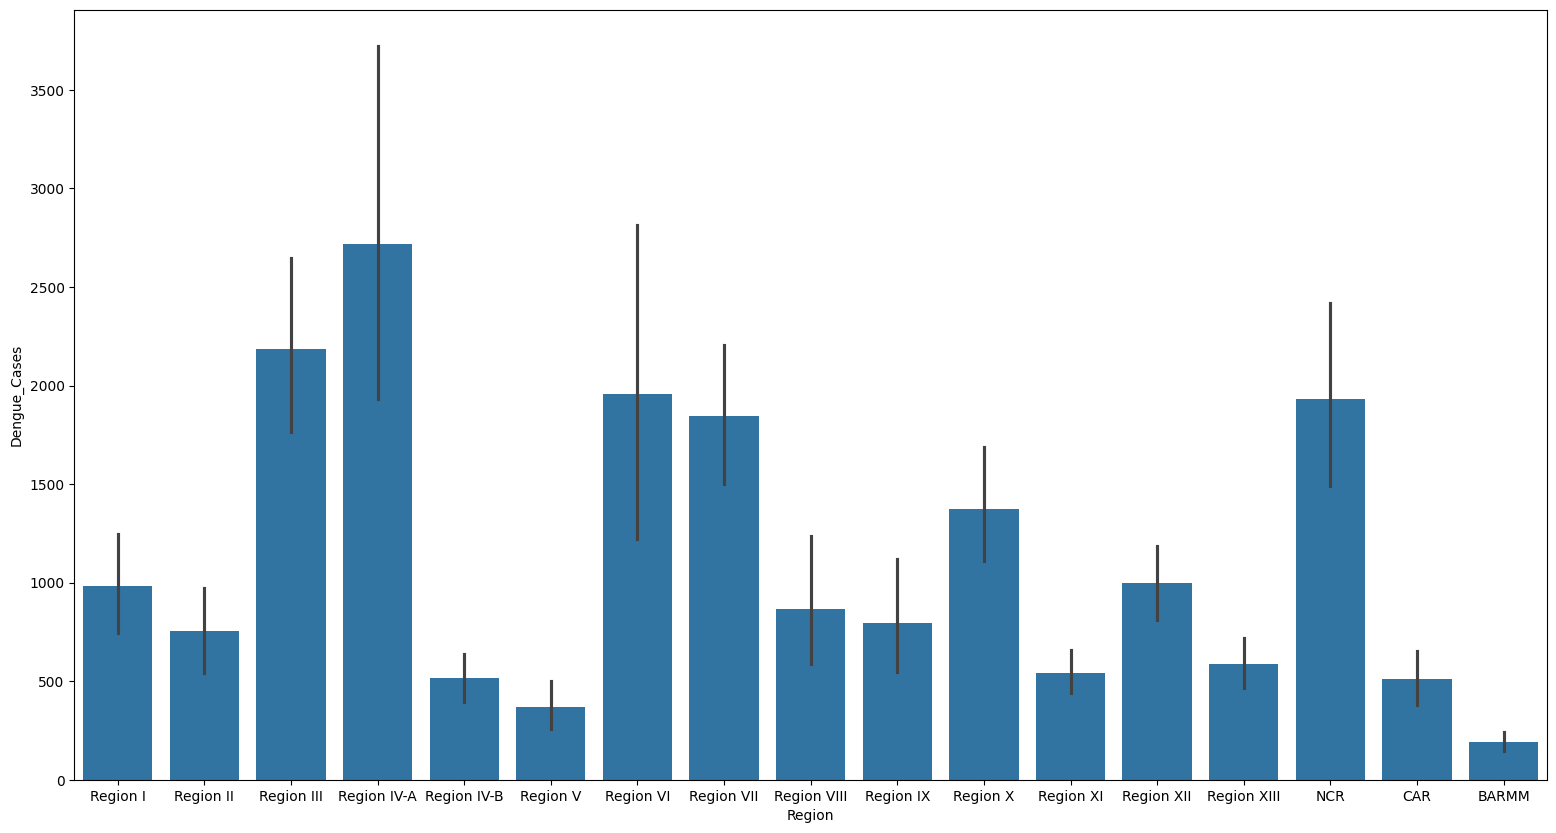

In [11]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The bar plot shows the distribution of total dengue cases across regions, highlighting noticeable differences in case volume. Some regions report significantly higher dengue incidence, indicating areas where dengue transmission is more active or persistent. Regions with the tallest bars represent key hotspots, likely influenced by population density, environmental conditions, and local public health practices. </p>

<h1> Mortality Rate per each Region </h1>

In [12]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [13]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [14]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [15]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


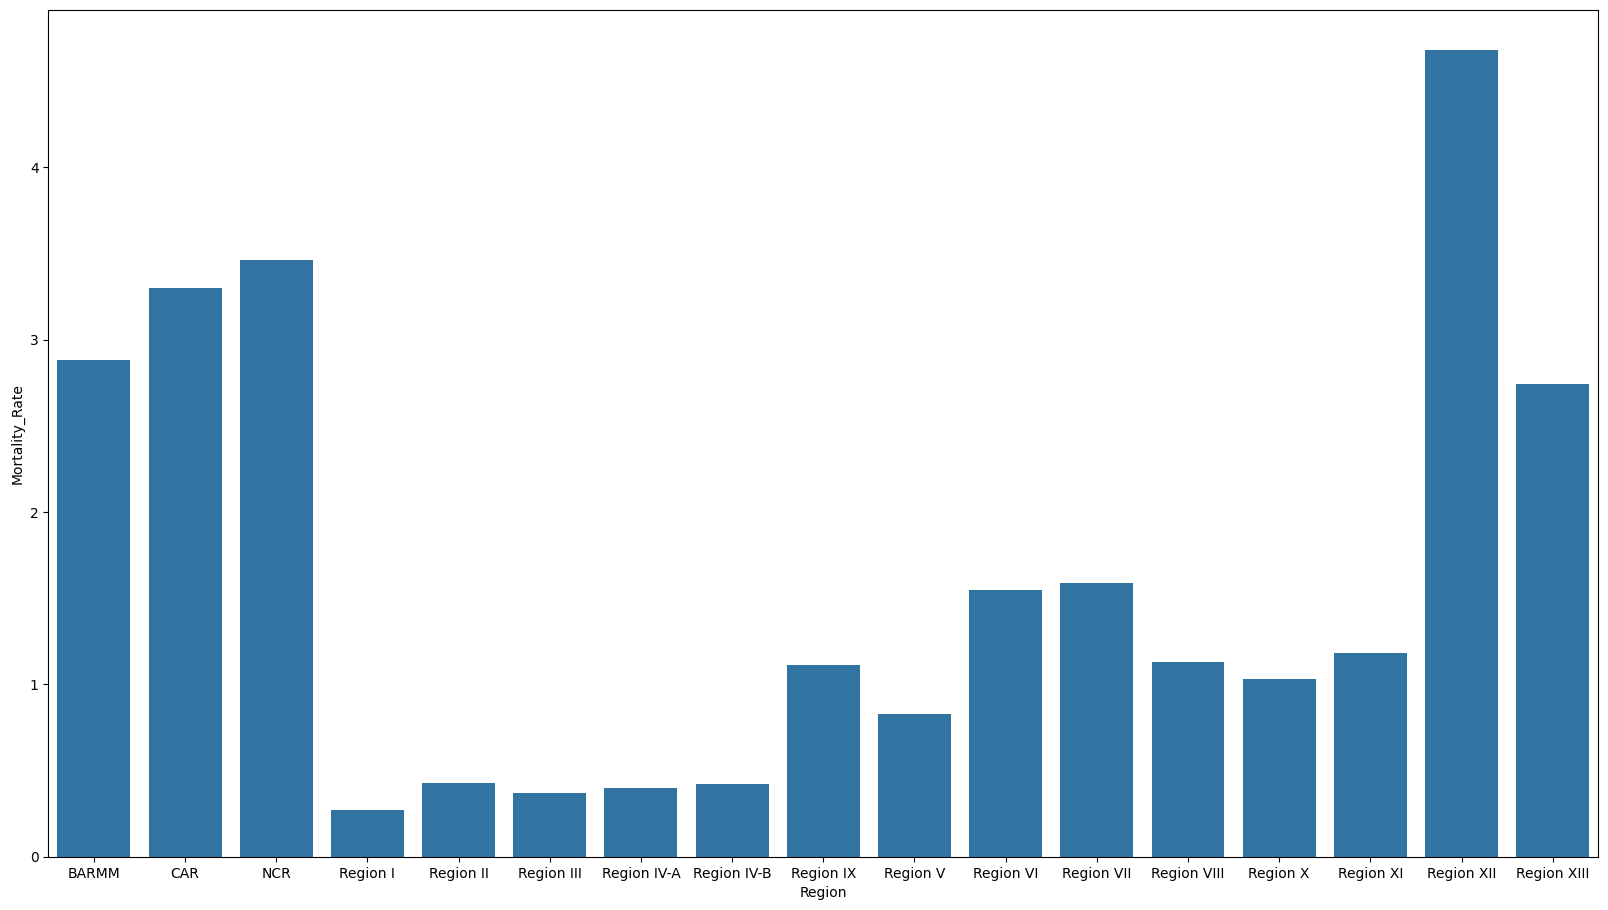

In [16]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

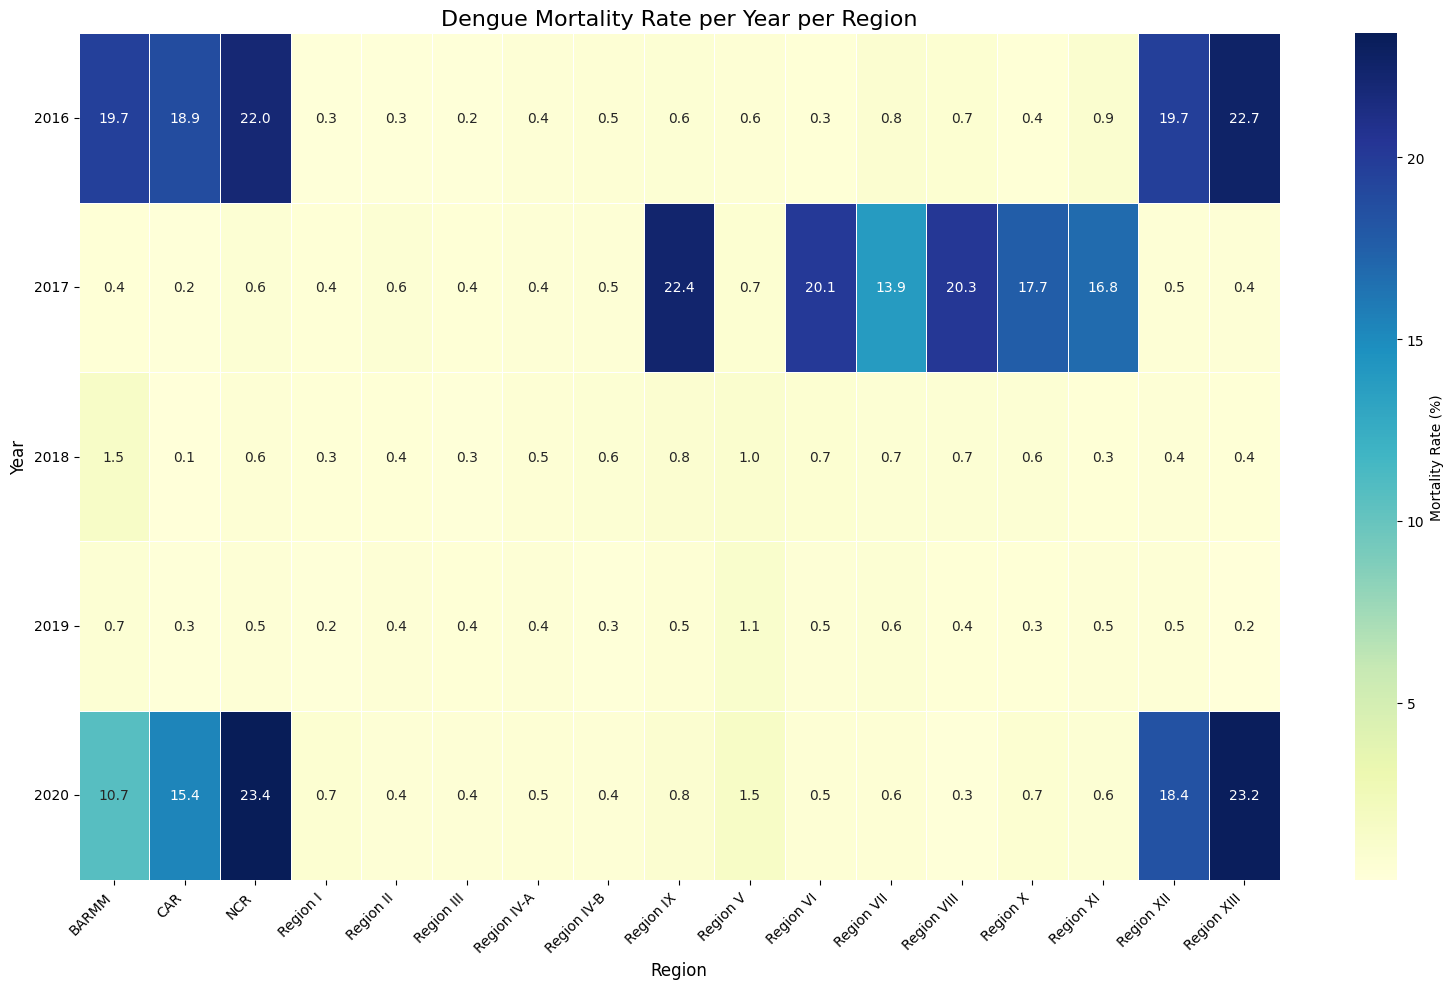

In [17]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<p> The heatmap highlights how dengue mortality rates vary across regions and over time. Darker or higher-valued cells indicate regions and years with elevated mortality, suggesting more severe outbreaks or potential gaps in healthcare access, early detection, and treatment. Lighter cells correspond to lower mortality rates, reflecting better case management or less severe dengue activity. </p>

<h1> PREDICTIVES </h1>

In [18]:
dengue['Month'] = dengue['Month'].astype('str')

In [19]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [20]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()


In [21]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
840,January,2016,NCR,1261,4,0.317209,2016-01-01
780,January,2016,Region XIII,1116,6,0.537634,2016-01-01
240,January,2016,Region IV-B,203,1,0.492611,2016-01-01
120,January,2016,Region III,1976,3,0.151822,2016-01-01
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,0.000000,2020-12-01
899,December,2020,NCR,658,4,0.607903,2020-12-01
59,December,2020,Region I,1081,1,0.092507,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01


In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression
#monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(lambda x: x.toordinal())
#other 
monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1) #independent variable 
y = monthly_cases['Dengue_Cases'].values   #dependent variable 

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.


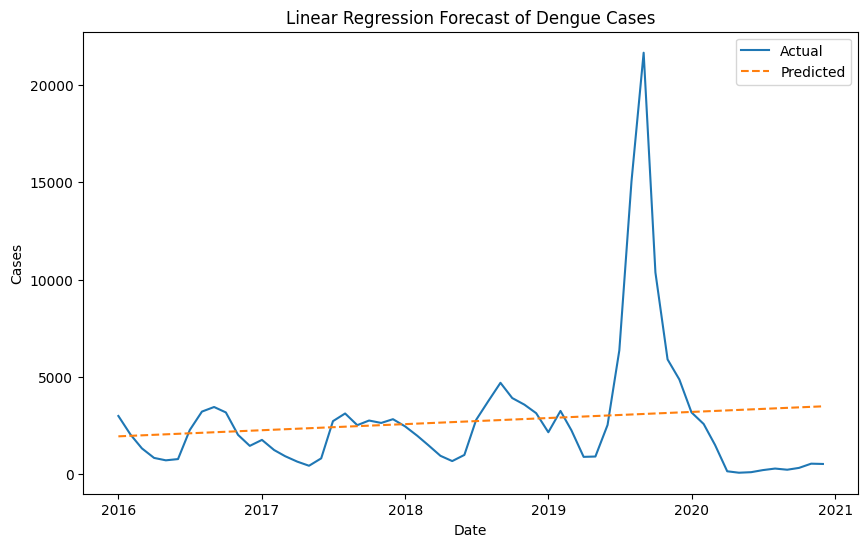

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()


<h1>Insight</h1>
<p>The plot compares actual dengue cases with values predicted by a linear regression model. The model successfully follows the overall trend of dengue cases over time but struggles to capture sharp increases or sudden peaks. While the predicted line shows the general direction of the trend, the gap between the two lines during high-case periods suggests that linear regression may not fully represent the seasonal and abrupt nature of dengue outbreaks.</p>

In [24]:
gas  = pd.read_csv('gas_prices.csv')

In [25]:
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np



X = gas['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = gas['USA'].values                  # Dependent variable (Gas Price in USA)

# # Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# # # Predict
gas['Predicted_Price'] = model.predict(X)

# # # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in gas prices in the USA.")

The model explains 70.8% of the variation in gas prices in the USA.


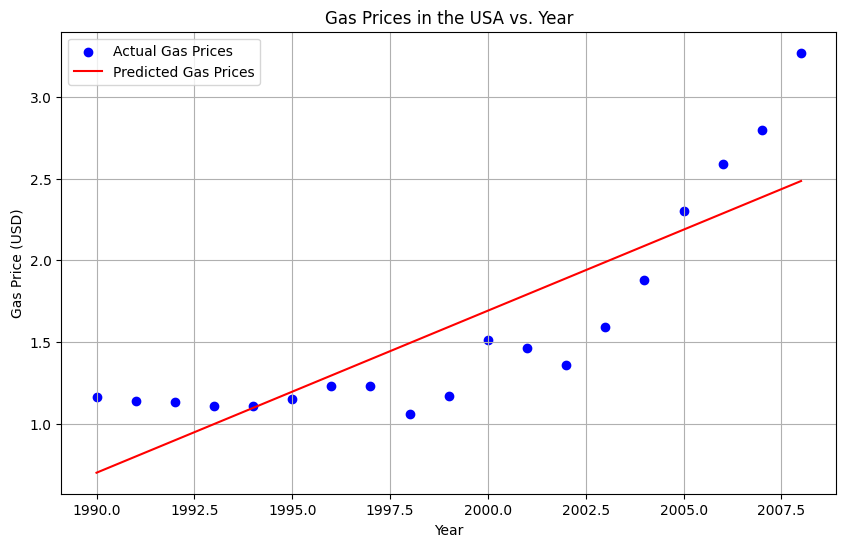

In [27]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(gas['Year'], gas['USA'], color='blue', label='Actual Gas Prices')
plt.plot(gas['Year'], gas['Predicted_Price'], color='red', label='Predicted Gas Prices')
plt.title('Gas Prices in the USA vs. Year')
plt.xlabel('Year')
plt.ylabel('Gas Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

<h1>Insight</h1>
<p>The plot compares the actual U.S. gas prices over time with the predicted prices generated by the model. The scatter points show how gas prices have fluctuated across the years, while the prediction line captures the overall upward trend. Although the model follows the general direction of price changes, it does not fully capture short-term spikes or drops, indicating that gas prices are influenced by factors beyond simple year-to-year patterns—such as global oil markets, economic conditions, and geopolitical events. Overall, the visualization highlights a long-term increasing trend in gas prices, with predictions providing a reasonable but simplified approximation of real-world behavior.</p>

In [28]:

# Create binary target: Outbreak = 1 if cases > 1000
dengue['Outbreak'] = (dengue['Dengue_Cases'] > 1000).astype(int)

In [29]:
# Encode categorical features
df_encoded = pd.get_dummies(dengue[['Region', 'Month']], drop_first=True)

# Combine with numerical features
df_model = pd.concat([df_encoded, dengue[['Year', 'Dengue_Cases', 'Outbreak']]], axis=1)

In [30]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Outbreak', axis=1)
y = df_model['Outbreak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148   0]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        56

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



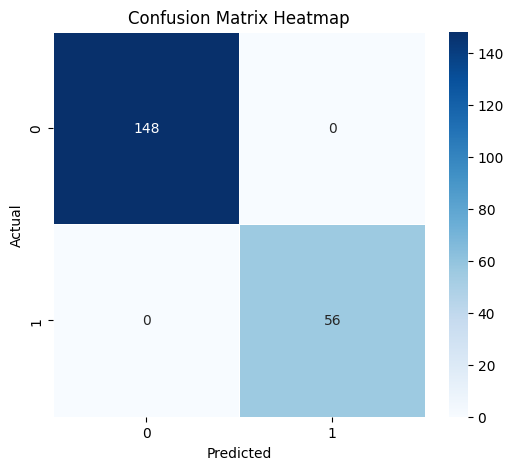

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


<h1>Insight</h1>
<p>The confusion matrix reveals how reliably the model distinguishes between the target classes. Strong diagonal values indicate that the model correctly identifies most cases, making it suitable for initial deployment or monitoring tasks. However, the presence of notable misclassifications in specific categories highlights risk areas where the model may lead to incorrect decisions.</p>